Mean after standardization: [ 8.23101924e-16 -2.01659971e-16 -7.40791731e-17 -8.23101924e-18
 -5.48734616e-18  2.74367308e-18]
Standard deviation after standardization: [1. 1. 1. 1. 1. 1.]


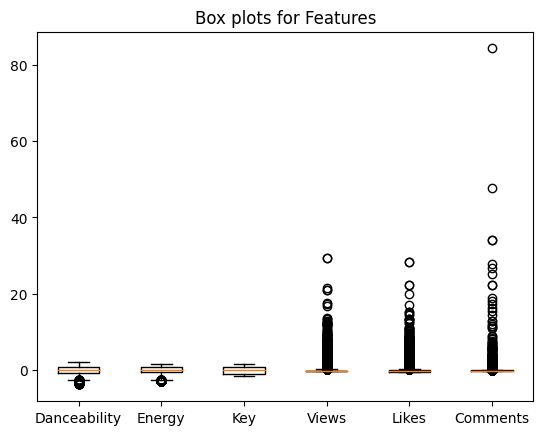


PCA Results:
Principal Components (PC1, PC2): [[-0.11752957 -0.68027703]
 [-0.09454093 -0.68726931]
 [-0.01481032 -0.20257729]
 [-0.58505664  0.07088144]
 [-0.62901735  0.0864129 ]
 [-0.48895333  0.1065605 ]]
Eigenvalues: [2.44781443 0.17593831 1.32265526 0.70027083 0.86325584 1.09035495]
PCA Result (First 5 rows): [[-3.81917106 -0.57003158]
 [-0.20339362 -0.5836459 ]
 [ 0.19576726 -1.0398337 ]
 [-0.81882305 -0.32814278]
 [-3.51492367 -0.15223257]]


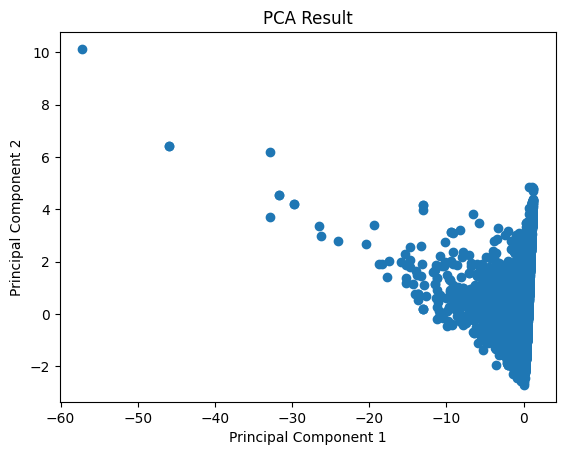

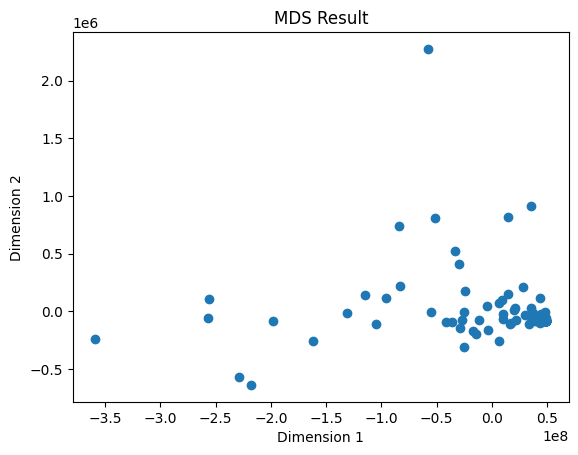

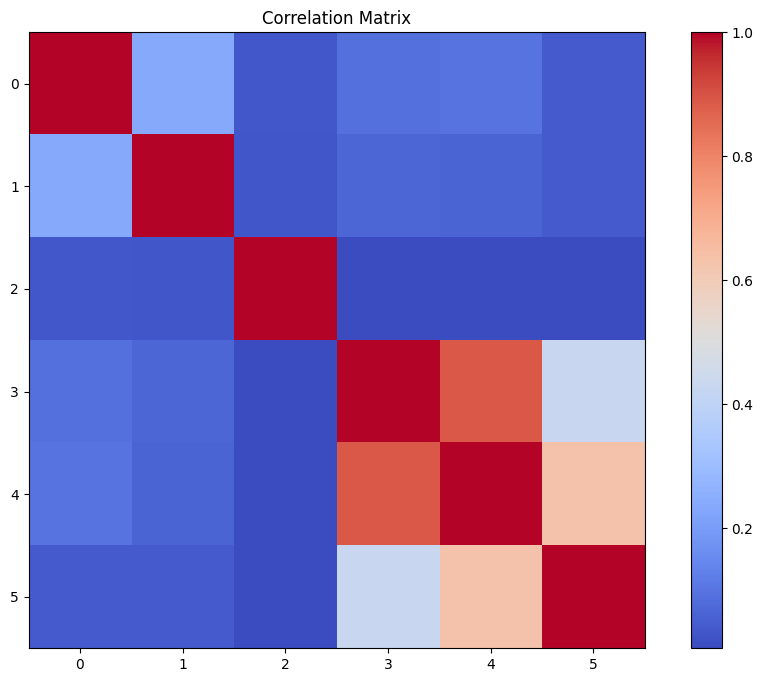

In [6]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
file_path = '/content/drive/MyDrive/Colab Notebooks/Spotify_Youtube.xlsx'
data = pd.read_excel(file_path)

# Select features for analysis
features = ['Danceability', 'Energy', 'Key', 'Views', 'Likes', 'Comments']

# Extract the relevant features from the dataset
selected_data = data[features].values

# Step 1: Handle NaN or Inf values
if np.isnan(selected_data).any() or np.isinf(selected_data).any():
    # Replace NaN and Inf values with a placeholder value or perform imputation
    selected_data = np.nan_to_num(selected_data, nan=0, posinf=1e10, neginf=-1e10)

# Step 2: Standardize the data
mean_vals = np.mean(selected_data, axis=0)
std_dev = np.std(selected_data, axis=0)
standardized_data = (selected_data - mean_vals) / std_dev

# Step 3: Check mean and standard deviation after standardization
print("Mean after standardization:", np.mean(standardized_data, axis=0))
print("Standard deviation after standardization:", np.std(standardized_data, axis=0))

# Step 4: Check for outliers using box plots
plt.boxplot(standardized_data, labels=features)
plt.title('Box plots for Features')
plt.show()

# Step 5: Increase regularization if needed
reg_param = 1e-1  # Adjust as needed
cov_matrix = np.cov(standardized_data, rowvar=False) + reg_param * np.identity(len(features))

# Step 6: Compute the eigenvectors and eigenvalues of the covariance matrix using eig function
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Step 7: Check for convergence
if not np.all(np.isfinite(eigenvalues)):
    raise ValueError("Eigenvalues did not converge. Please check data for numerical stability.")

# Step 8: Sort the eigenvectors by decreasing eigenvalues
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvectors_sorted = eigenvectors[:, sorted_indices]

# Step 9: Project the data onto the first two principal components
pca_result = standardized_data @ eigenvectors_sorted[:, :2]

# Print PCA Results
print("\nPCA Results:")
print("Principal Components (PC1, PC2):", eigenvectors_sorted[:, :2])
print("Eigenvalues:", eigenvalues)
print("PCA Result (First 5 rows):", pca_result[:5, :])

# Step 10: Visualize the data after dimensionality reduction using PCA
plt.scatter(pca_result[:, 0], pca_result[:, 1])
plt.title('PCA Result')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Step 11: Calculate the Euclidean distance matrix for sampled data
sampled_data = selected_data[np.random.choice(selected_data.shape[0], size=100, replace=False), :]
distance_matrix = np.linalg.norm(sampled_data[:, None] - sampled_data, axis=2)

# Step 12: Use MDS to generate two-dimensional data from the distance matrix
def classical_mds(distances):
    n = distances.shape[0]
    H = np.eye(n) - np.ones((n, n)) / n
    B = -0.5 * H @ distances**2 @ H
    eigenvalues, eigenvectors = np.linalg.eigh(B)
    indices = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[indices]
    eigenvectors = eigenvectors[:, indices]
    nonzero_eigenvalues = eigenvalues[eigenvalues > 1e-10]
    k = len(nonzero_eigenvalues)
    positive_eigenvalues_sqrt = np.sqrt(nonzero_eigenvalues)
    W = eigenvectors[:, :k] @ np.diag(positive_eigenvalues_sqrt)
    return W

mds_result = classical_mds(distance_matrix)

# Step 13: Visualize the two-dimensional data obtained from MDS
plt.scatter(mds_result[:, 0], mds_result[:, 1])
plt.title('MDS Result')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()

# Example code for correlation matrix
correlation_matrix = data[features].corr()
plt.figure(figsize=(12, 8))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.title('Correlation Matrix')
plt.show()
